# Numerical examples for $p+2$ paper

## Cubic Schrödinger equation

In [1]:
using TSSM
include(string(ENV["HOME"], "/.julia/dev/TSSM/examples/time_stepper.jl"))

local_orders (generic function with 5 methods)

### Exact solution

In [2]:
const κ = -1.0
const a = 2.0
const b = 1.0
const c= 0.0
function soliton(x, t)
    h = (a^2 - b^2)/2*t - b*x
    (a./cosh(a*(b*t+x-c))).*exp(1im*h) 
end

soliton (generic function with 1 method)

### Computational domain

In [3]:
nx = 512
xmin = -16
xmax = +16
method = Schroedinger1D(nx, xmin, xmax, cubic_coupling=κ)

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType}) at TSSM.jl:492
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:492
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55
┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = cfunction_check_return_type(::Function, ::Type, ::Tuple{DataType,DataType}) at TSSM.jl:492
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/TSSM.jl:492
┌ Warning: The function `cfunction` is now written as a macro `@cfunction`.
│   caller = cfunction(::Function, ::Type, ::Tuple{DataType,DataType}) at deprecated.jl:55
└ @ Base ./deprecated.jl:55


Schroedinger1D{Float64}(Ptr{Nothing} @0x000000000370cf80)

In [4]:
t0 = 0
tend = 1
psi = wave_function(method)
psi_ref = wave_function(method)
set!(psi, soliton, t0)        # initial data at t=t0
set!(psi_ref, soliton, tend)  # reference solution at t=tend

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = set!(::WfSchroedinger1D{Float64}, ::Function, ::Int64) at tssm_common.jl:415
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/tssm_common.jl:415


### Local errors Strang splitting (Table2)

In [5]:
local_orders(psi, soliton, t0, 1/32, DefectBasedScheme(Strang, 2, true), operator_sequence="AB", rows=7)
;

             dt         err      p         err      p
------------------------------------------------------
  

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = set!(::WfSchroedinger1D{Float64}, ::Function, ::Float64) at tssm_common.jl:415
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/tssm_common.jl:415


1   3.125e-02   2.997e-04          8.112e-06
  2   1.563e-02   3.791e-05   2.98   3.377e-07   4.59
  3   7.813e-03   4.753e-06   3.00   1.161e-08   4.86
  4   3.906e-03   5.946e-07   3.00   3.726e-10   4.96
  5   1.953e-03   7.434e-08   3.00   1.172e-11   4.99
  6   9.766e-04   9.293e-09   3.00   3.669e-13   5.00
  7   4.883e-04   1.162e-09   3.00   1.160e-14   4.98


### Local errors Emb 5/3 AK s (Table2)

In [6]:
scheme4=(
 0.267171359000977615, -0.361837907604416033,
-0.0338279096695056672, 0.861837907604416033,
 0.5333131013370561044, 0.861837907604416033,
-0.0338279096695056672,-0.361837907604416033,
 0.267171359000977615,  0.0)
local_orders(psi, soliton, t0, 1/16, DefectBasedScheme(scheme4, 4, true), operator_sequence="AB", rows=5);


             dt         err      p         err      p
------------------------------------------------------
  1   6.250e-02   1.805e-04          2.805e-05
  2   3.125e-02   7.017e-06   4.69   3.420e-07   6.36
  3   1.563e-02   2.282e-07   4.94   2.646e-09   7.01
  4   7.813e-03   7.164e-09   4.99   2.123e-11   6.96
  5   3.906e-03   2.240e-10   5.00   1.706e-13   6.96


### Global errors Strang splitting, basis scheme 

In [7]:
global_orders(psi, psi_ref, t0, tend, 1/32, scheme=Strang, rows=12); 


             dt         err      p
-----------------------------------
  1   3.125e-02   1.071e-02
  2   1.563e-02   2.698e-03   1.99
  3   7.813e-03   6.758e-04   2.00
  4   3.906e-03   1.690e-04   2.00
  5   1.953e-03   4.226e-05   2.00
  6   9.766e-04   1.057e-05   2.00
  7   4.883e-04   2.642e-06   2.00
  8   2.441e-04   6.604e-07   2.00
  9   1.221e-04   1.651e-07   2.00
 10   6.104e-05   4.128e-08   2.00
 11   3.052e-05   1.032e-08   2.00
 12   1.526e-05   2.571e-09   2.01


### Global errors Strang splitting, corrected scheme 

In [8]:
global_orders(psi, psi_ref, t0, tend, 1/32, scheme=Strang, rows=7, 
    corrector="symmetrized_defect_based", order=2); 


             dt         err      p
-----------------------------------
  1   3.125e-02   4.797e-05
  2   1.563e-02   3.010e-06   3.99
  3   7.813e-03   1.902e-07   3.98
  4   3.906e-03   1.196e-08   3.99
  5   1.953e-03   7.496e-10   4.00
  6   9.766e-04   4.648e-11   4.01
  7   4.883e-04   2.177e-12   4.42


### Global errors Emb 5/3 AK s, basis scheme

In [9]:
global_orders(psi, psi_ref, t0, tend, 1/8, scheme=scheme4, rows=9); 

             dt         err      p
-----------------------------------
  1   1.250e-01   1.002e-02
  2   6.250e-02   6.265e-04   4.00
  3   3.125e-02   1.770e-05   5.15
  4   1.563e-02   9.166e-07   4.27
  5   7.813e-03   5.702e-08   4.01
  6   3.906e-03   3.560e-09   4.00
  7   1.953e-03   2.220e-10   4.00
  8   9.766e-04   1.297e-11   4.10
  9   4.883e-04   1.823e-12   2.83


### Global errors Emb 5/3 AK s, corrected scheme

In [10]:
global_orders(psi, psi_ref, t0, tend, 1/8, scheme=scheme4, rows=7, 
    corrector="symmetrized_defect_based", order=4); 


             dt         err      p
-----------------------------------
  1   1.250e-01   2.736e-03
  2   6.250e-02   1.300e-04   4.40
  3   3.125e-02   1.944e-06   6.06
  4   1.563e-02   5.064e-09   8.58
  5   7.813e-03   3.011e-11   7.39
  6   3.906e-03   6.426e-13   5.55
  7   1.953e-03   8.827e-13  -0.46


### Plot of adaptive step-sizes

In [11]:
const aa=[2.0, 2.0,  0.0,  0.0] #amplitude
const bb=[1.0,-3.0,  1.0, -9.0] #speed
const cc=[5.0,-5.0,  0.0, -10.0] #offset x

function two_solitons(x)
    (aa[1]/cosh(aa[1]*(x-cc[1]))) * exp(-bb[1]*x*1im)+
    (aa[2]/cosh(aa[2]*(x-cc[2]))) * exp(-bb[2]*x*1im)
end

two_solitons (generic function with 1 method)

In [12]:
t0 = 0
tend = 5
tol =1e-7

1.0e-7

In [13]:
x = get_nodes(method)
to_real_space!(psi)
u = get_data(psi, true);

In [14]:
set!(psi, two_solitons)

plotdata=abs.(u).^2
steps=[0.0]
mytime=[0.0]
told=0.0
nsteps=0


@time  for t in adaptive_time_stepper(psi, t0, tend, 0.01, tol, DefectBasedScheme(scheme4, 4, true), "AB")
      push!(steps,t-told)
      push!(mytime,t)
      told=t
      nsteps=nsteps+1  
      to_real_space!(psi)
      plotdata = [plotdata abs.(u).^2]
 end

┌ Warning: `cfunction(f, r, a::Tuple)` is deprecated, use `cfunction(f, r, Tuple{a...})` instead.
│   caller = set!(::WfSchroedinger1D{Float64}, ::Function) at tssm_common.jl:400
└ @ TSSM /home/hofi/.julia/dev/TSSM/src/tssm_common.jl:400
┌ Warning: Deprecated syntax `implicit assignment to global variable `told``.
│ Use `global told` instead.
└ @ nothing none:0
┌ Warning: Deprecated syntax `implicit assignment to global variable `nsteps``.
│ Use `global nsteps` instead.
└ @ nothing none:0
┌ Warning: Deprecated syntax `implicit assignment to global variable `plotdata``.
│ Use `global plotdata` instead.
└ @ nothing none:0
┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::AdaptiveTimeStepperIterator)`.
│   caller = ip:0x0
└ @ Core :-1


  0.726751 seconds (383.70 k allocations: 642.596 MiB, 8.28% gc time)


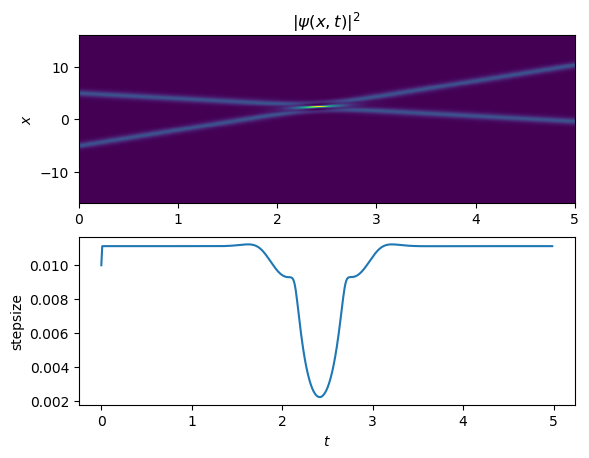

PyObject Text(24.0, 0.5, 'stepsize')

In [15]:
using PyPlot
  figure(1)
  subplot(2, 1, 1)
  pcolormesh(mytime,x,plotdata)
  #xlabel("\$t\$")
  ylabel("\$x\$")
  axis([t0,tend,xmin,xmax])
  title("\$|\\psi(x,t)|^2\$")

  subplot(2, 1, 2)
  plot(mytime[1:end-2], steps[2:end-1])
  xlabel("\$t\$")
  ylabel("stepsize")
#  savefig("step.png", bbox_inches="tight")
